In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [34]:
df = pd.read_csv('df_cleanedv1.csv')

In [3]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-01,WN,WN,WN,1997,WN,N733SA,1997,13232,MDW,"Chicago, IL",13198,MCI,"Kansas City, MO",1920,2003.0,43.0,13.0,2016.0,2122.0,4.0,2050,2126.0,36.0,0.0,0.0,N,90.0,83.0,66.0,1.0,405.0,10.0,0.0,0.0,0.0,26.0
1,2018-01-01,WN,WN,WN,181,WN,N8633A,181,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",855,947.0,52.0,8.0,955.0,1306.0,5.0,1230,1311.0,41.0,0.0,0.0,N,155.0,144.0,131.0,1.0,990.0,11.0,0.0,0.0,0.0,30.0
2,2018-01-01,WN,WN,WN,185,WN,N8625A,185,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1250,1307.0,17.0,12.0,1319.0,1629.0,5.0,1625,1634.0,9.0,0.0,0.0,N,155.0,147.0,130.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-01,WN,WN,WN,403,WN,N564WN,403,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1615,1617.0,2.0,11.0,1628.0,1935.0,5.0,1945,1940.0,-5.0,0.0,0.0,N,150.0,143.0,127.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01,WN,WN,WN,1229,WN,N8305E,1229,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",700,719.0,19.0,16.0,735.0,1043.0,6.0,1035,1049.0,14.0,0.0,0.0,N,155.0,150.0,128.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0


* Task 7: Test the hypothesis whether planes fly faster when there is the departure delay
* Task 5: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?
* Task 1: Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers
* Task 2: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

# Task 1
Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers

In [160]:
import scipy.stats as st

In [161]:
delays = df['arr_delay']

In [162]:
delays.describe()

count    30376.000000
mean         5.187615
std         48.767277
min        -65.000000
25%        -15.000000
50%         -6.000000
75%          7.000000
max       1350.000000
Name: arr_delay, dtype: float64

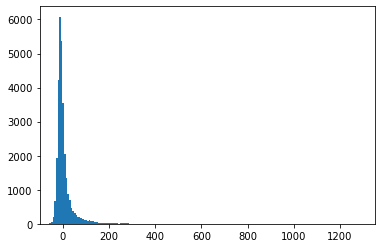

In [163]:
# before anything
plt.hist(delays, bins=200)
plt.xlim([-100, 1350])
plt.show()

In [164]:
# removing outliers, those greater than 2 std from mean
delay_sorted = sorted(delays)

out_threshold= 2.0*np.std(delay_sorted+[-a for a in delay_sorted])
delay_sorted=[i for i in delay_sorted if i<out_threshold]

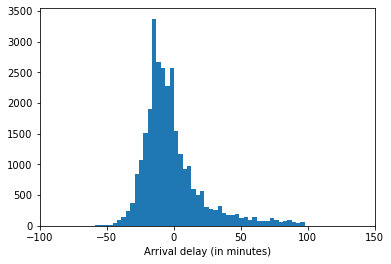

In [165]:
plt.hist(delay_sorted, bins=50)
plt.xlim([-100, 150])
plt.xlabel('Arrival delay (in minutes)')
plt.show()

In [166]:
k2, p = st.normaltest(delay_sorted)
k2, p

(9479.24850836807, 0.0)

Not normally distributed. Seems right skewed, even after removal of outliers. Outliers all fell to the right

# Task 5
What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [ ]:
# kinda confused by question
# should I do a total delay and see what % of it is departure? if dep delay > 0
# dep_delay / dep_delay + arr_delay

In [167]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [168]:
# flights that had departure delays
dep_delays = df['dep_delay'] > 0 
df[dep_delays][['dep_delay', 'arr_delay']]

,dep_delay,arr_delay
0,43.0,36.0
1,52.0,41.0
2,17.0,9.0
3,2.0,-5.0
4,19.0,14.0
...,...,...
30356,8.0,-4.0
30357,36.0,27.0
30364,8.0,8.0
30365,39.0,39.0


In [169]:
# percentage of flights with a departure delay
delays_count = df[dep_delays]['dep_delay'].count()
total_count = df['dep_delay'].count()
percent_delay = delays_count/total_count * 100

# average depature delay
average_delay = df[dep_delays]['dep_delay'].mean()

print(f'Percent of flights delayed at departure: {percent_delay}' + '%')
print(f'Average departure delay in minutes: {average_delay}')

Percent of flights delayed at departure: 34.072952330787466%
Average departure delay in minutes: 39.80830917874396


In [170]:
# flights that have both a departure delay and an arrival delay
delays = (df['dep_delay'] > 0) & (df['arr_delay'] > 0)
df[delays][['dep_delay', 'arr_delay']]

,dep_delay,arr_delay
0,43.0,36.0
1,52.0,41.0
2,17.0,9.0
4,19.0,14.0
7,186.0,178.0
...,...,...
30353,57.0,58.0
30357,36.0,27.0
30364,8.0,8.0
30365,39.0,39.0


In [171]:
# percentage of flights that have a departure delay and an arrival delay
delays_count2 = df[delays]['dep_delay'].count()
total_count = df['dep_delay'].count()
percent_delay2 = delays_count2/total_count * 100

print(f'Percent of flights delayed at departure and that have a delayed arrival: {percent_delay2}' + '%')

Percent of flights delayed at departure and that have a delayed arrival: 24.739926257571767%


In [172]:
delays_count2/delays_count * 100

72.60869565217392

72.6% of flights with a departure delay end up with an arrival delay. Can also refer to scatter plot later on to see that depature delay is very strongly correlated with arrival delay

In [173]:
# flights that have a lower arrival delay compared to departure delay
delay_lowered = (df['dep_delay'] > 0) & (df['arr_delay'] < df['dep_delay'])
df[delay_lowered][['dep_delay', 'arr_delay']]

,dep_delay,arr_delay
0,43.0,36.0
1,52.0,41.0
2,17.0,9.0
3,2.0,-5.0
4,19.0,14.0
...,...,...
30348,53.0,35.0
30352,36.0,24.0
30356,8.0,-4.0
30357,36.0,27.0


It looks like from above that delay from departure can be lowered during flight. About 70% of the flights that had a depature delay had a lower arrival delay compared to departure delay

In [204]:
delays_count3 = df[delay_lowered]['arr_delay'].count()
percent3 = delays_count3/delays_count * 100
print(f'{percent3}% of flights with a departure delay had a lower arrival delay than departure delay')

70.91787439613526% of flights with a departure delay had a lower arrival delay than departure delay


# Task 7
Test the hypothesis whether planes fly faster when there is the departure delay

In [174]:
df.columns   # going to use distance / air_time to calculate speed

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [175]:
delay_speed = pd.DataFrame()

# flights with delay
have_delay = df['dep_delay'] > 0
delay_speed['flight_speed'] = df[have_delay]['distance'] / df[have_delay]['air_time']

In [176]:
delay_speed # note: speed is in miles/minute

,flight_speed
0,6.136364
1,7.557252
2,7.615385
3,7.795276
4,7.734375
...,...
30356,4.934783
30357,4.978261
30364,4.803571
30365,6.706667


In [178]:
no_delay_speed = pd.DataFrame()

# flights with no delay
no_delay = df['dep_delay'] <= 0
no_delay_speed['flight_speed'] = df[no_delay]['distance'] / df[no_delay]['air_time']

In [179]:
no_delay_speed  # also in miles/minute

,flight_speed
21,7.173913
27,5.655172
35,4.982759
37,5.160714
38,4.982759
...,...
30371,7.120879
30372,6.410959
30373,7.660377
30374,7.315315


In [185]:
# 2 sample t test. Need same amount of observations
have_delay_sample = delay_speed.sample(n=800)
no_delay_sample = no_delay_speed.sample(n=800)

In [188]:
statistics, pvalue = st.ttest_ind(have_delay_sample['flight_speed'], no_delay_sample['flight_speed'])
pvalue

0.2772080270430786

In [191]:
delay_speed_mean = delay_speed['flight_speed'].mean()
no_delay_speed_mean = no_delay_speed['flight_speed'].mean()

In [192]:
print(f'Mean speed of flights with departure delay: {delay_speed_mean} miles/minutes')
print(f'Mean speed of flights with no departure delay: {no_delay_speed_mean} miles/minutes')

Mean speed of flights with departure delay: 6.752130777409817 miles/minutes
Mean speed of flights with no departure delay: 6.591952486677182 miles/minutes


# Extra Task (accidentally did feature engineering)
create bins for the 4 different seasons (summer, fall, winter, spring) and see if arrival/departure delays are different for each season

In [219]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-01,WN,WN,WN,1997,WN,N733SA,1997,13232,MDW,"Chicago, IL",13198,MCI,"Kansas City, MO",1920,2003.0,43.0,13.0,2016.0,2122.0,4.0,2050,2126.0,36.0,0.0,0.0,N,90.0,83.0,66.0,1.0,405.0,10.0,0.0,0.0,0.0,26.0
1,2018-01-01,WN,WN,WN,181,WN,N8633A,181,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",855,947.0,52.0,8.0,955.0,1306.0,5.0,1230,1311.0,41.0,0.0,0.0,N,155.0,144.0,131.0,1.0,990.0,11.0,0.0,0.0,0.0,30.0
2,2018-01-01,WN,WN,WN,185,WN,N8625A,185,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1250,1307.0,17.0,12.0,1319.0,1629.0,5.0,1625,1634.0,9.0,0.0,0.0,N,155.0,147.0,130.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-01,WN,WN,WN,403,WN,N564WN,403,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1615,1617.0,2.0,11.0,1628.0,1935.0,5.0,1945,1940.0,-5.0,0.0,0.0,N,150.0,143.0,127.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01,WN,WN,WN,1229,WN,N8305E,1229,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",700,719.0,19.0,16.0,735.0,1043.0,6.0,1035,1049.0,14.0,0.0,0.0,N,155.0,150.0,128.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0


In [233]:
first = df.iloc[1, 0].split('-')  # middle number is the month
first

['2018', '01', '01']

In [35]:
df2 = df.copy()

In [36]:
def month_extractor(data):
    """
    Considers every row of the first column of the dataframe (it should be a date in the format of yyyy-mm-dd),
    splits the string, takes the month from the date, and finally adds it in a new column titled "month"
    
    for the first row:
    data[0] = 2018-01-01  -> data[month] = 01
    
    """
    temp_list = []
    for item in data.iloc[:, 0]:
        list_word = item.split('-')
        temp_list.append(list_word[1])
    data['month'] = temp_list
    return data

In [37]:
month_extractor(df2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,month
0,2018-01-01,WN,WN,WN,1997,WN,N733SA,1997,13232,MDW,"Chicago, IL",13198,MCI,"Kansas City, MO",1920,2003.0,43.0,13.0,2016.0,2122.0,4.0,2050,2126.0,36.0,0.0,0.0,N,90.0,83.0,66.0,1.0,405.0,10.0,0.0,0.0,0.0,26.0,01
1,2018-01-01,WN,WN,WN,181,WN,N8633A,181,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",855,947.0,52.0,8.0,955.0,1306.0,5.0,1230,1311.0,41.0,0.0,0.0,N,155.0,144.0,131.0,1.0,990.0,11.0,0.0,0.0,0.0,30.0,01
2,2018-01-01,WN,WN,WN,185,WN,N8625A,185,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1250,1307.0,17.0,12.0,1319.0,1629.0,5.0,1625,1634.0,9.0,0.0,0.0,N,155.0,147.0,130.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01
3,2018-01-01,WN,WN,WN,403,WN,N564WN,403,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1615,1617.0,2.0,11.0,1628.0,1935.0,5.0,1945,1940.0,-5.0,0.0,0.0,N,150.0,143.0,127.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01
4,2018-01-01,WN,WN,WN,1229,WN,N8305E,1229,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",700,719.0,19.0,16.0,735.0,1043.0,6.0,1035,1049.0,14.0,0.0,0.0,N,155.0,150.0,128.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30371,2019-07-31,DL,DL_CODESHARE,DL,3290,9E,N914XJ,3290,15412,TYS,"Knoxville, TN",12953,LGA,"New York, NY",805,749.0,-16.0,12.0,801.0,932.0,15.0,1013,947.0,-26.0,0.0,0.0,N,128.0,118.0,91.0,1.0,648.0,0.0,0.0,0.0,0.0,0.0,07
30372,2019-07-31,DL,DL_CODESHARE,DL,3291,9E,N311PQ,3291,10721,BOS,"Boston, MA",13931,ORF,"Norfolk, VA",605,555.0,-10.0,26.0,621.0,734.0,5.0,750,739.0,-11.0,0.0,0.0,N,105.0,104.0,73.0,1.0,468.0,0.0,0.0,0.0,0.0,0.0,07
30373,2019-07-31,DL,DL_CODESHARE,DL,3292,9E,N297PQ,3292,11193,CVG,"Cincinnati, OH",11298,DFW,"Dallas/Fort Worth, TX",700,655.0,-5.0,14.0,709.0,755.0,7.0,831,802.0,-29.0,0.0,0.0,N,151.0,127.0,106.0,1.0,812.0,0.0,0.0,0.0,0.0,0.0,07
30374,2019-07-31,DL,DL_CODESHARE,DL,3292,9E,N297PQ,3292,11298,DFW,"Dallas/Fort Worth, TX",11193,CVG,"Cincinnati, OH",906,858.0,-8.0,15.0,913.0,1204.0,5.0,1232,1209.0,-23.0,0.0,0.0,N,146.0,131.0,111.0,1.0,812.0,0.0,0.0,0.0,0.0,0.0,07


In [255]:
# bin the months according to this scheme:
# winter: 12, 1, 2
# spring: 3, 4, 5
# summer: 6, 7, 8
# autumn: 9, 10, 11

In [38]:
df2['season'] = ""

In [39]:
for index, row in df2.iterrows():
    if '12' in row['month'] or '01' in row['month'] or '02' in row['month']:
        df2.loc[df.index[index], 'season'] = 'Winter'
    elif '03' in row['month'] or '04' in row['month'] or '05' in row['month']:
        df2.loc[df.index[index], 'season'] = 'Spring'
    elif '06' in row['month'] or '07' in row['month'] or '08' in row['month']:
        df2.loc[df.index[index], 'season'] = 'Summer'
    elif '09' in row['month'] or '10' in row['month'] or '11' in row['month']:
        df2.loc[df.index[index], 'season'] = 'Autumn'

function below if needed

In [325]:
def season_adder(data):
    for index, row in data.iterrows():
        if '12' in row['month'] or '01' in row['month'] or '02' in row['month']:
            data.loc[df.index[index], 'season'] = 'Winter'
        elif '03' in row['month'] or '04' in row['month'] or '05' in row['month']:
            data.loc[df.index[index], 'season'] = 'Spring'
        elif '06' in row['month'] or '07' in row['month'] or '08' in row['month']:
            data.loc[df.index[index], 'season'] = 'Summer'
        elif '09' in row['month'] or '10' in row['month'] or '11' in row['month']:
            data.loc[df.index[index], 'season'] = 'Autumn' 
    return data

In [40]:
df2['season'].value_counts()

Summer    8261
Spring    7898
Autumn    7460
Winter    6757
Name: season, dtype: int64

In [41]:
season_means_arr = df2.groupby(by='season')['arr_delay'].mean().reset_index()
season_means_arr

,season,arr_delay
0,Autumn,3.824397
1,Spring,3.594581
2,Summer,8.012831
3,Winter,5.100636


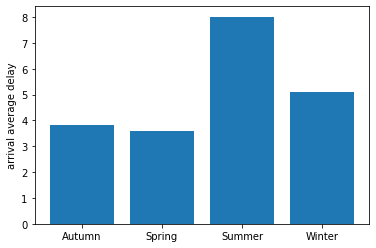

In [45]:
season = season_means_arr['season']
delay = season_means_arr['arr_delay']
plt.bar(season, delay)
plt.ylabel('arrival average delay')
plt.show()

This result above is more interesting/more useful. The one below was just for exploratory purposes

In [323]:
season_means_dep = df2.groupby(by='season')['dep_delay'].mean().reset_index()
season_means_dep

,season,dep_delay
0,Autumn,8.995308
1,Spring,9.055584
2,Summer,12.313037
3,Winter,10.555128


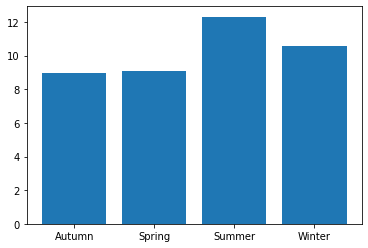

In [324]:
season = season_means_dep['season']
delay = season_means_dep['dep_delay']
plt.bar(season, delay)
plt.show()

# Task 2
Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [10]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,month,season
0,2018-01-01,WN,WN,WN,1997,WN,N733SA,1997,13232,MDW,"Chicago, IL",13198,MCI,"Kansas City, MO",1920,2003.0,43.0,13.0,2016.0,2122.0,4.0,2050,2126.0,36.0,0.0,0.0,N,90.0,83.0,66.0,1.0,405.0,10.0,0.0,0.0,0.0,26.0,01,Winter
1,2018-01-01,WN,WN,WN,181,WN,N8633A,181,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",855,947.0,52.0,8.0,955.0,1306.0,5.0,1230,1311.0,41.0,0.0,0.0,N,155.0,144.0,131.0,1.0,990.0,11.0,0.0,0.0,0.0,30.0,01,Winter
2,2018-01-01,WN,WN,WN,185,WN,N8625A,185,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1250,1307.0,17.0,12.0,1319.0,1629.0,5.0,1625,1634.0,9.0,0.0,0.0,N,155.0,147.0,130.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01,Winter
3,2018-01-01,WN,WN,WN,403,WN,N564WN,403,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1615,1617.0,2.0,11.0,1628.0,1935.0,5.0,1945,1940.0,-5.0,0.0,0.0,N,150.0,143.0,127.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01,Winter
4,2018-01-01,WN,WN,WN,1229,WN,N8305E,1229,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",700,719.0,19.0,16.0,735.0,1043.0,6.0,1035,1049.0,14.0,0.0,0.0,N,155.0,150.0,128.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01,Winter


In [11]:
df2['month'].value_counts()

08    2912
06    2801
04    2669
03    2635
05    2594
11    2587
07    2548
09    2469
01    2413
10    2404
12    2264
02    2080
Name: month, dtype: int64

In [43]:
month_avg_delay = df2.groupby(by='month')['arr_delay'].mean().reset_index()
month_avg_delay

,month,arr_delay
0,01,2.680481
1,02,6.248077
2,03,0.269070
3,04,4.648183
4,05,5.888589
5,06,6.730810
6,07,6.585950
7,08,10.494505
8,09,1.411503
9,10,3.098170


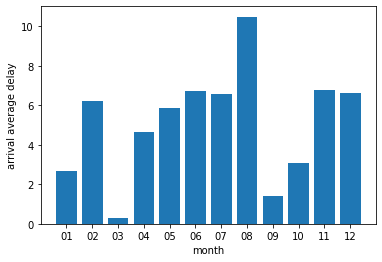

In [46]:
month = month_avg_delay['month']
delay = month_avg_delay['arr_delay']
plt.bar(month, delay)
plt.xlabel('month')
plt.ylabel('arrival average delay')
plt.show()

# Extra task (also somewhat feature engineering)
average delay per month per carrier

In [51]:
# adding carrier name
df2['carrier_name'] = ''
my_dict ={
    'UA':'United Airlines',
    'PT':'Piedmont Airlines',
    'G7':'Lindbergh Airlines',
    'CP':'Compass Airlines',
    'QX':'Horizon Airlines',
    'AX':'Trans States Airlines',
    'ZW':'Air Wisconsin',
    'C5':'CommutAir',
    'EM':'Anderson Aviation',
    'KS':'Peninsula Airways',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}
for word in my_dict.keys():
    df2.loc[df2['op_unique_carrier'].str.contains(word, na=False), 
                   ['carrier_name']] = my_dict[word]

In [52]:
df2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,month,season,carrier_name
0,2018-01-01,WN,WN,WN,1997,WN,N733SA,1997,13232,MDW,"Chicago, IL",13198,MCI,"Kansas City, MO",1920,2003.0,43.0,13.0,2016.0,2122.0,4.0,2050,2126.0,36.0,0.0,0.0,N,90.0,83.0,66.0,1.0,405.0,10.0,0.0,0.0,0.0,26.0,01,Winter,Southwest Airlines
1,2018-01-01,WN,WN,WN,181,WN,N8633A,181,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",855,947.0,52.0,8.0,955.0,1306.0,5.0,1230,1311.0,41.0,0.0,0.0,N,155.0,144.0,131.0,1.0,990.0,11.0,0.0,0.0,0.0,30.0,01,Winter,Southwest Airlines
2,2018-01-01,WN,WN,WN,185,WN,N8625A,185,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1250,1307.0,17.0,12.0,1319.0,1629.0,5.0,1625,1634.0,9.0,0.0,0.0,N,155.0,147.0,130.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01,Winter,Southwest Airlines
3,2018-01-01,WN,WN,WN,403,WN,N564WN,403,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1615,1617.0,2.0,11.0,1628.0,1935.0,5.0,1945,1940.0,-5.0,0.0,0.0,N,150.0,143.0,127.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01,Winter,Southwest Airlines
4,2018-01-01,WN,WN,WN,1229,WN,N8305E,1229,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",700,719.0,19.0,16.0,735.0,1043.0,6.0,1035,1049.0,14.0,0.0,0.0,N,155.0,150.0,128.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0,01,Winter,Southwest Airlines


In [53]:
df2.to_csv(r'./df_celeanedv1_2.csv', index = False)

In [28]:
# average delay per month per carrier
delay_per_month_per_carrier = df2.groupby(by=['carrier_name', 'month'])['arr_delay'].mean().reset_index()
delay_per_month_per_carrier

,carrier_name,month,arr_delay
0,Air Wisconsin,01,13.178571
1,Air Wisconsin,02,-8.000000
2,Air Wisconsin,07,-3.767442
3,Air Wisconsin,08,-13.517241
4,Air Wisconsin,09,-8.400000
...,...,...,...
264,United Airlines,09,-3.833333
265,United Airlines,10,0.938679
266,United Airlines,11,-0.060000
267,United Airlines,12,24.316239


In [24]:
delay_per_month_per_carrier.to_csv(r'./delay_per_month_per_carrierv1.csv', index = False)

Test to see if above table is correct

In [31]:
united_airlines = df2['carrier_name'] == 'United Airlines'
df2[united_airlines].groupby(by='month')['arr_delay'].mean()

month
01    -7.101695
02    -3.849162
03     1.854890
04     3.434307
05     8.881356
06    -2.662791
07    -3.148760
08    24.081159
09    -3.833333
10     0.938679
11    -0.060000
12    24.316239
Name: arr_delay, dtype: float64

Looks like it adds up! How to plot this though

# Exploration

In [30]:
distance = df['distance']

In [31]:
distance.describe()

count    30376.000000
mean       764.246708
std        579.078823
min         31.000000
25%        347.000000
50%        600.000000
75%        994.000000
max       4983.000000
Name: distance, dtype: float64

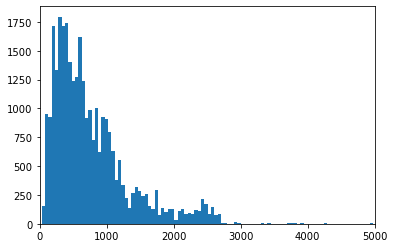

In [32]:
# distance histogram
plt.hist(distance, bins=100)
plt.xlim([0, 5000])
plt.show()

<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

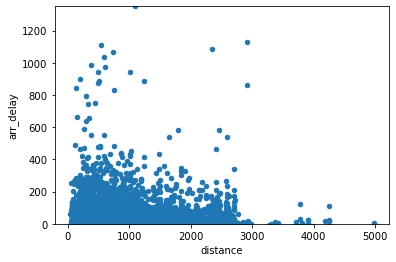

In [218]:
# scatter plot of distance vs arrival delay
data = df[['arr_delay', 'distance']]
data.plot.scatter(x='distance', y='arr_delay', ylim=(0,1350))

Nothing very useful from here. Check for flights with no departure delay but with arrival delay vs distance?

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

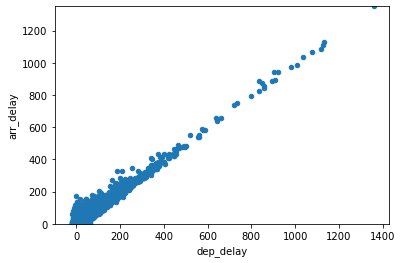

In [121]:
# scatter plot of departure delay vs arrival delay
data = df[['dep_delay', 'arr_delay']]
data.plot.scatter(x='dep_delay', y='arr_delay', ylim=(0,1350))

Unsurpringsly, departure delay very correlated with arrival delay

<AxesSubplot:>

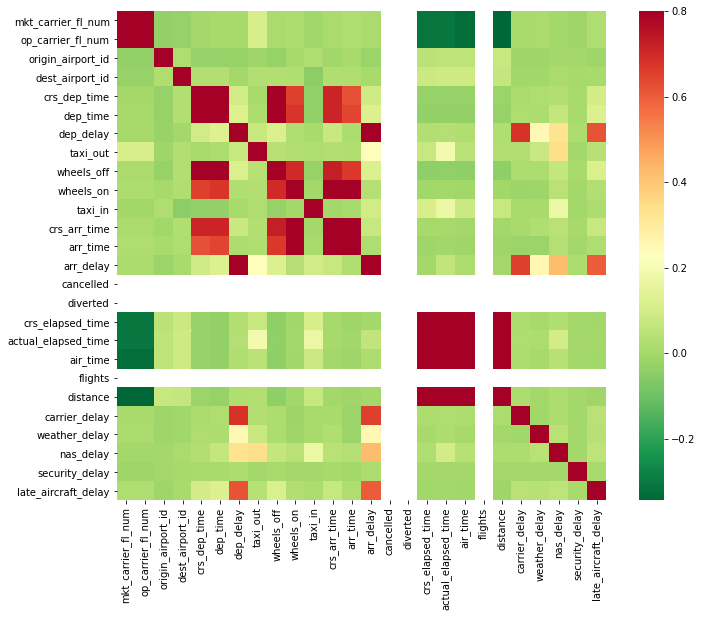

In [43]:
# correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

Nothing very useful either...

In [15]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-01,WN,WN,WN,1997,WN,N733SA,1997,13232,MDW,"Chicago, IL",13198,MCI,"Kansas City, MO",1920,2003.0,43.0,13.0,2016.0,2122.0,4.0,2050,2126.0,36.0,0.0,0.0,N,90.0,83.0,66.0,1.0,405.0,10.0,0.0,0.0,0.0,26.0
1,2018-01-01,WN,WN,WN,181,WN,N8633A,181,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",855,947.0,52.0,8.0,955.0,1306.0,5.0,1230,1311.0,41.0,0.0,0.0,N,155.0,144.0,131.0,1.0,990.0,11.0,0.0,0.0,0.0,30.0
2,2018-01-01,WN,WN,WN,185,WN,N8625A,185,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1250,1307.0,17.0,12.0,1319.0,1629.0,5.0,1625,1634.0,9.0,0.0,0.0,N,155.0,147.0,130.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-01,WN,WN,WN,403,WN,N564WN,403,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",1615,1617.0,2.0,11.0,1628.0,1935.0,5.0,1945,1940.0,-5.0,0.0,0.0,N,150.0,143.0,127.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01,WN,WN,WN,1229,WN,N8305E,1229,13232,MDW,"Chicago, IL",13204,MCO,"Orlando, FL",700,719.0,19.0,16.0,735.0,1043.0,6.0,1035,1049.0,14.0,0.0,0.0,N,155.0,150.0,128.0,1.0,990.0,0.0,0.0,0.0,0.0,0.0


Relevant carriers

In [17]:
len(df['op_unique_carrier'].unique())

27

In [48]:
df['op_unique_carrier'].unique()

array(['WN', 'DL', 'MQ', 'YV', 'PT', 'UA', 'OO', 'EV', 'G7', 'YX', '9E',
       'G4', 'AA', 'CP', 'QX', 'NK', 'AX', 'HA', 'B6', 'OH', 'AS', 'F9',
       'ZW', 'C5', 'EM', 'KS', 'VX'], dtype=object)

In [49]:
len(df['origin_city_name'].unique()) # 339 airports... how do we use this

339